In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
def run_tsne_grid(embedding_df, perplexities=[i for i in range(5,51)], n_components_list=[2]):
    for n_comp in n_components_list:
        for perplex in perplexities:
            tsne = TSNE(n_components=n_comp, perplexity=perplex, random_state=42)
            reduced = tsne.fit_transform(embedding_df.values)

            df_vis = pd.DataFrame(reduced, columns=[f"Dim_{i+1}" for i in range(n_comp)])
            df_vis["item_id"] = embedding_df.index

            plt.figure(figsize=(7, 5))
            sns.scatterplot(data=df_vis, x="Dim_1", y="Dim_2", s=10)
            plt.title(f"t-SNE | components={n_comp}, perplexity={perplex}")
            plt.xlabel("Dimension 1")
            plt.ylabel("Dimension 2")
            plt.grid(True)
            plt.tight_layout()
            plt.show()

📌 BoW Embedding Visualization


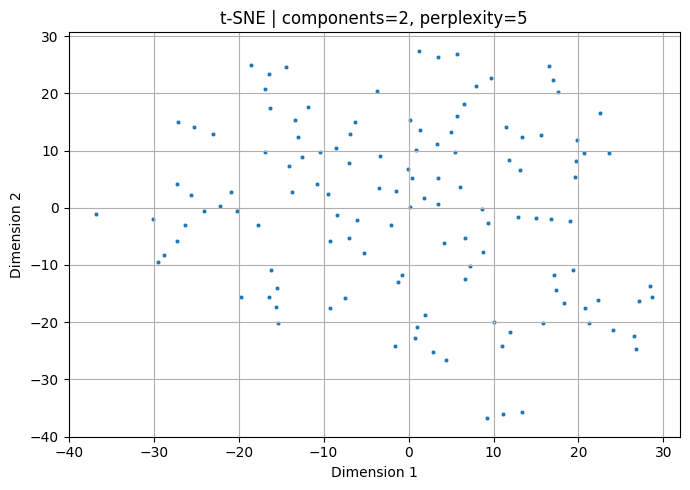

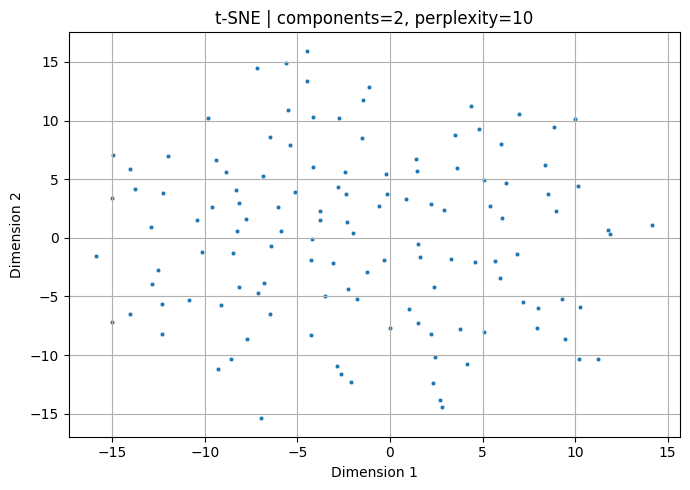

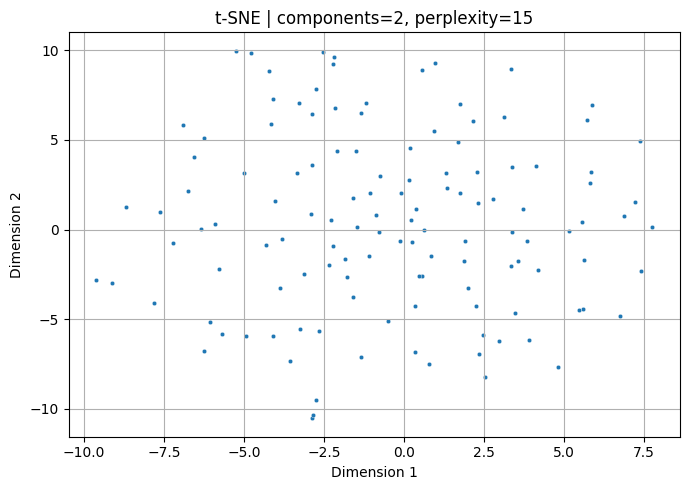

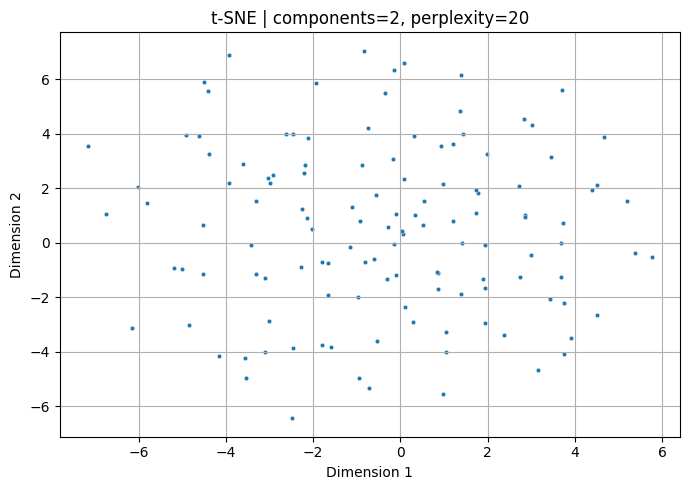

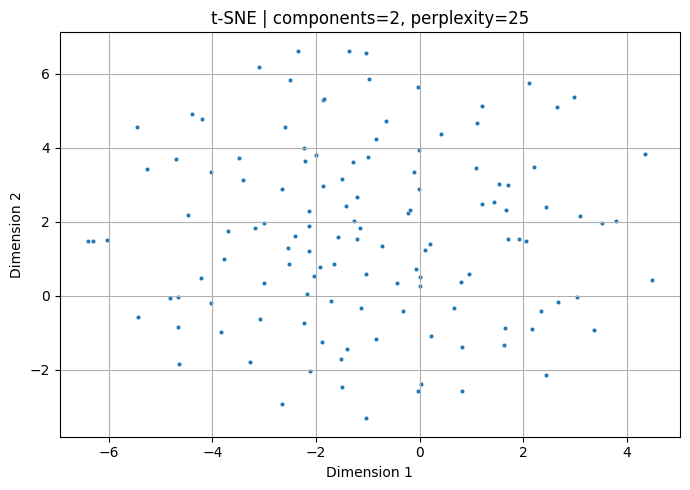

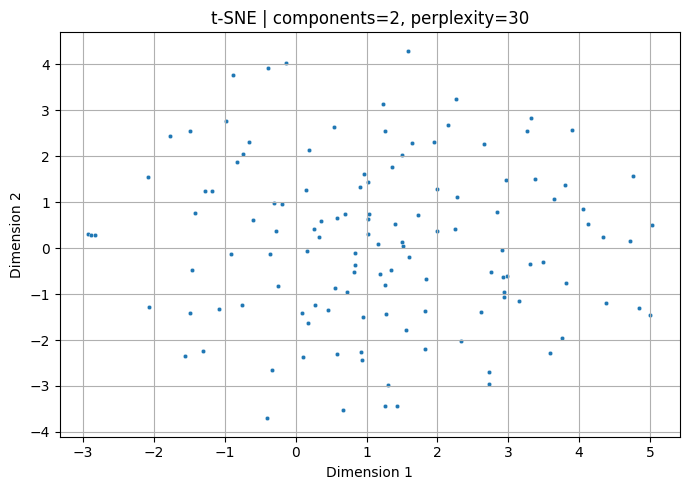

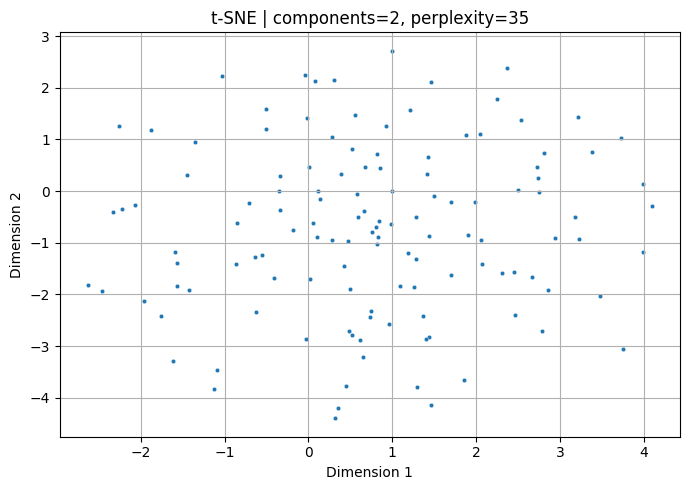

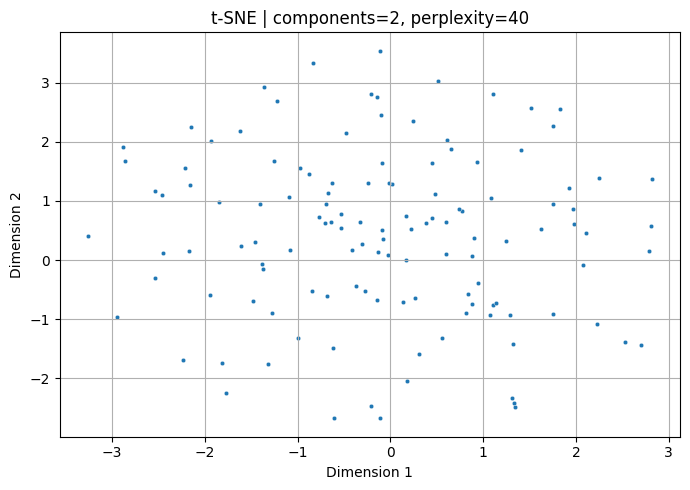

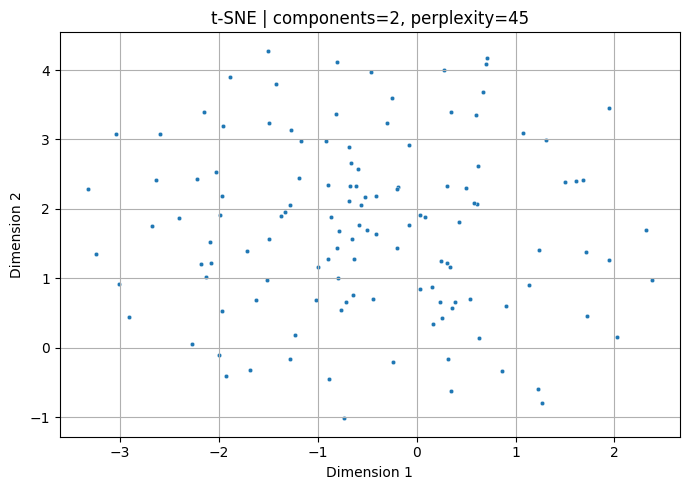

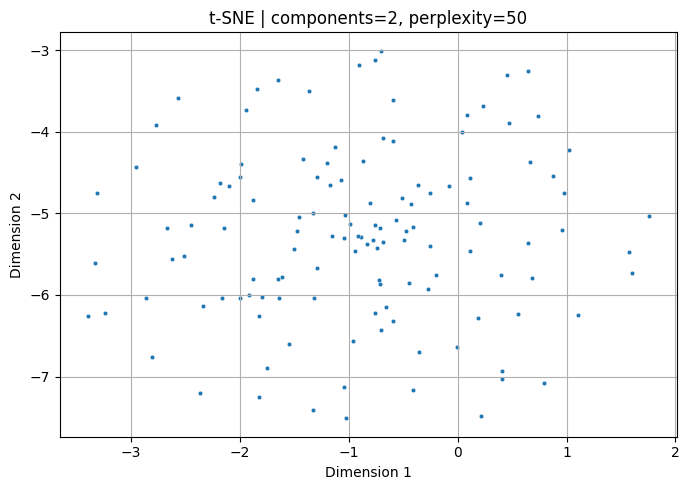

📌 BERT Embedding Visualization


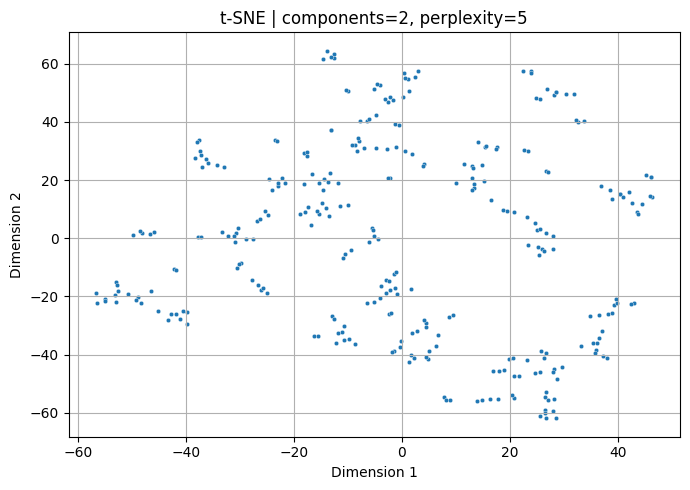

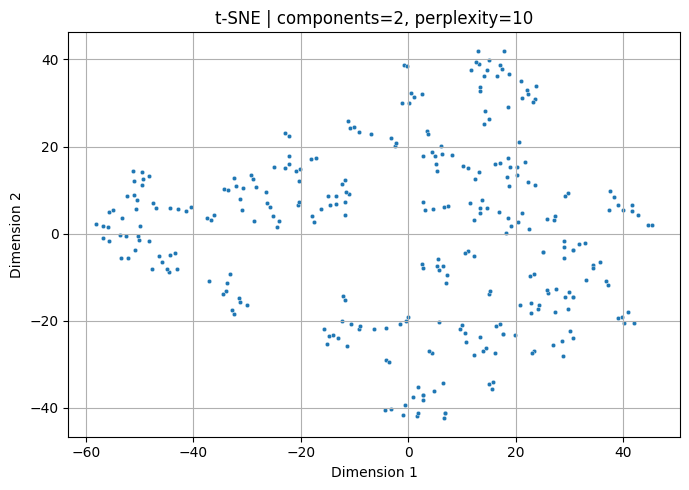

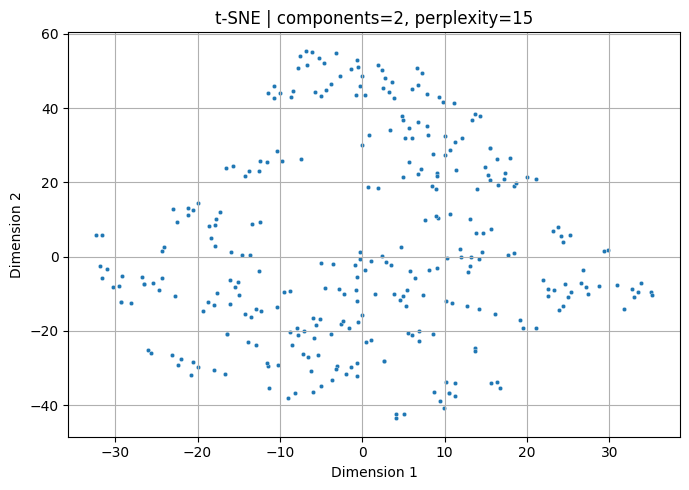

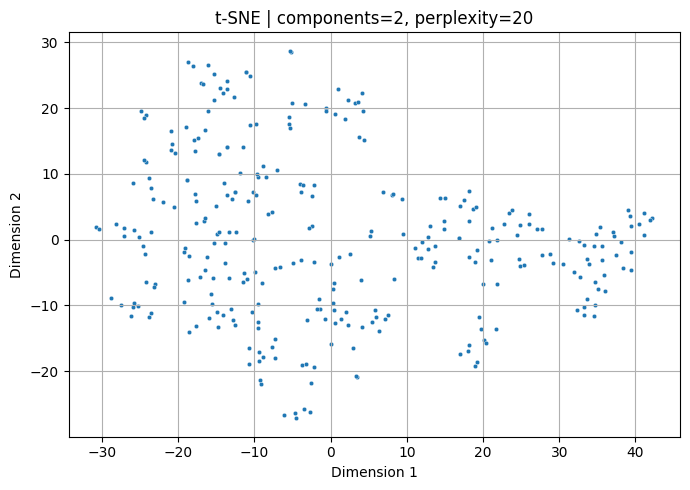

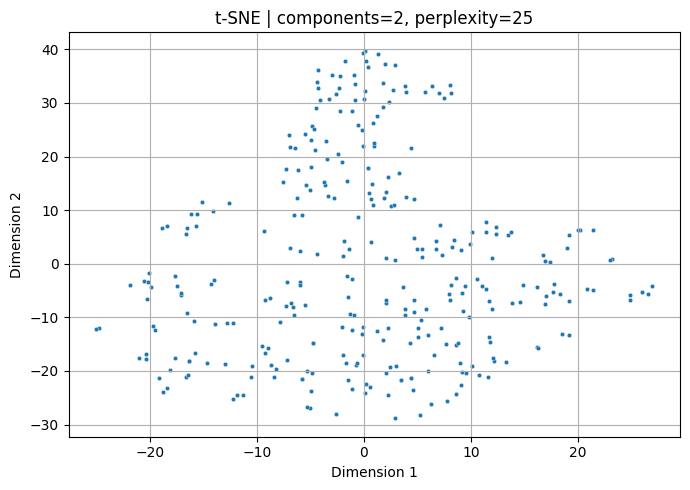

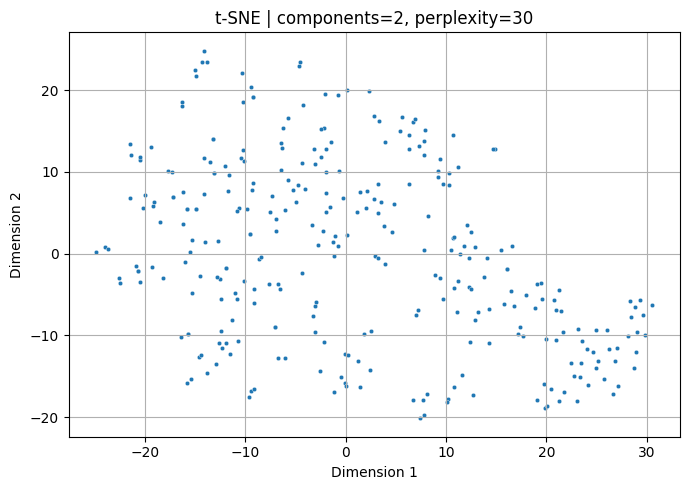

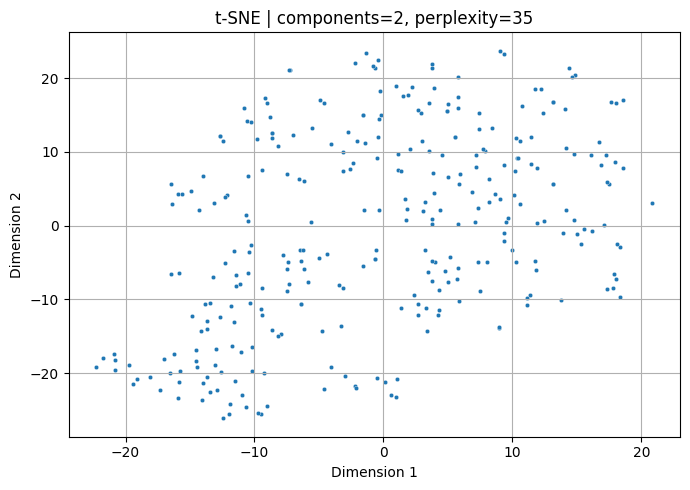

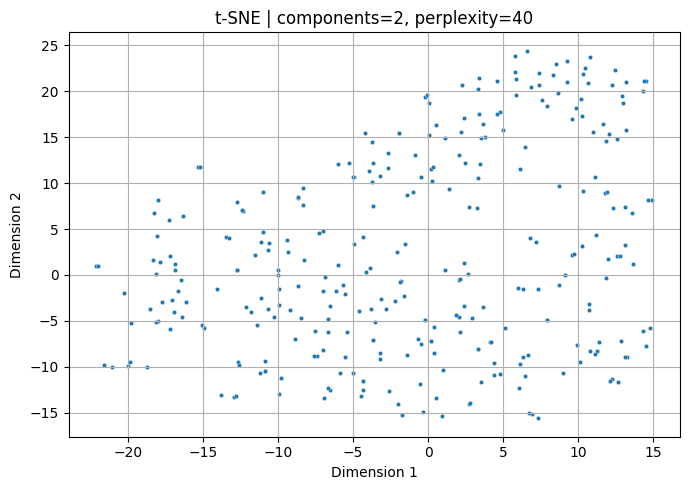

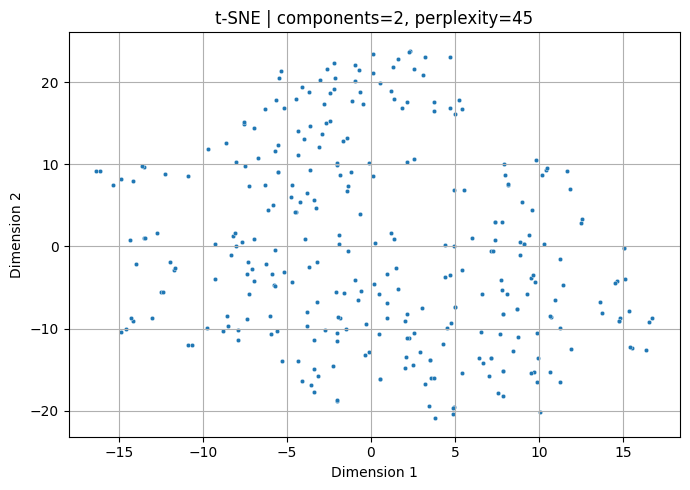

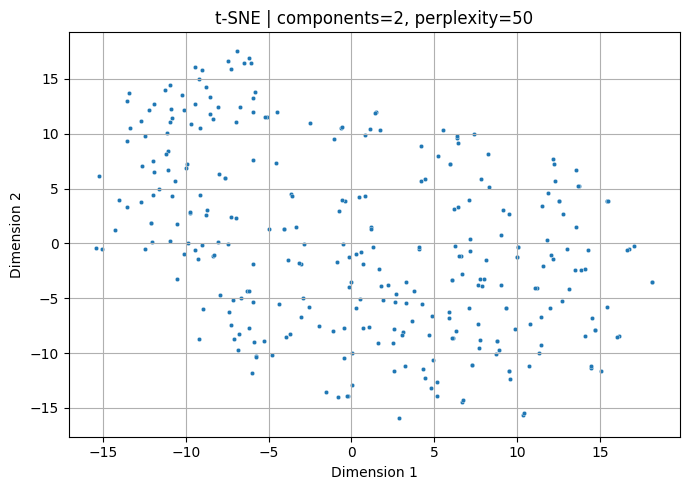

In [3]:
bow_emb = pd.read_csv("../data/item_emb.csv", index_col=0)
bert_emb = pd.read_csv("../data/course_bert_emb.csv", index_col=0)

print("📌 BoW Embedding Visualization")
run_tsne_grid(bow_emb,perplexities=[5,10,15,20,25,30,35,40,45,50])

print("📌 BERT Embedding Visualization")
run_tsne_grid(bert_emb, perplexities=[5,10,15,20,25,30,35,40,45,50])

In [9]:
import pandas as pd

# --- Fix user BERT embeddings ---
user_df = pd.read_csv("data/user_bert_emb.csv", index_col=0)
user_df.columns = [f"UFeature{i}" for i in range(user_df.shape[1])]
user_df.to_csv("data/user_bert_emb.csv")

# --- Fix item BERT embeddings ---
item_df = pd.read_csv("data/course_bert_emb.csv", index_col=0)
item_df.columns = [f"CFeature{i}" for i in range(item_df.shape[1])]
item_df.to_csv("data/course_bert_emb.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'data/user_bert_emb.csv'